# Heart Disease Prediction

#### Imports

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


#### Anlyze the data

In [87]:
df = pd.read_csv("heart_disease.csv")

df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [89]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

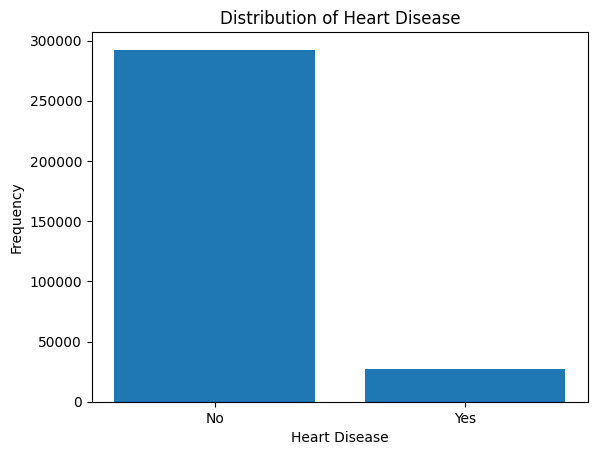

In [90]:
counts = df["HeartDisease"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.title("Distribution of Heart Disease")
plt.show()



In [91]:
new_df = df.copy()  # create a copy of the original dataframe

le = LabelEncoder()
for column in new_df.columns:
    if is_numeric_dtype(new_df[column]):
        continue
    new_df[column] = le.fit_transform(new_df[column])



In [92]:
new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


<Axes: >

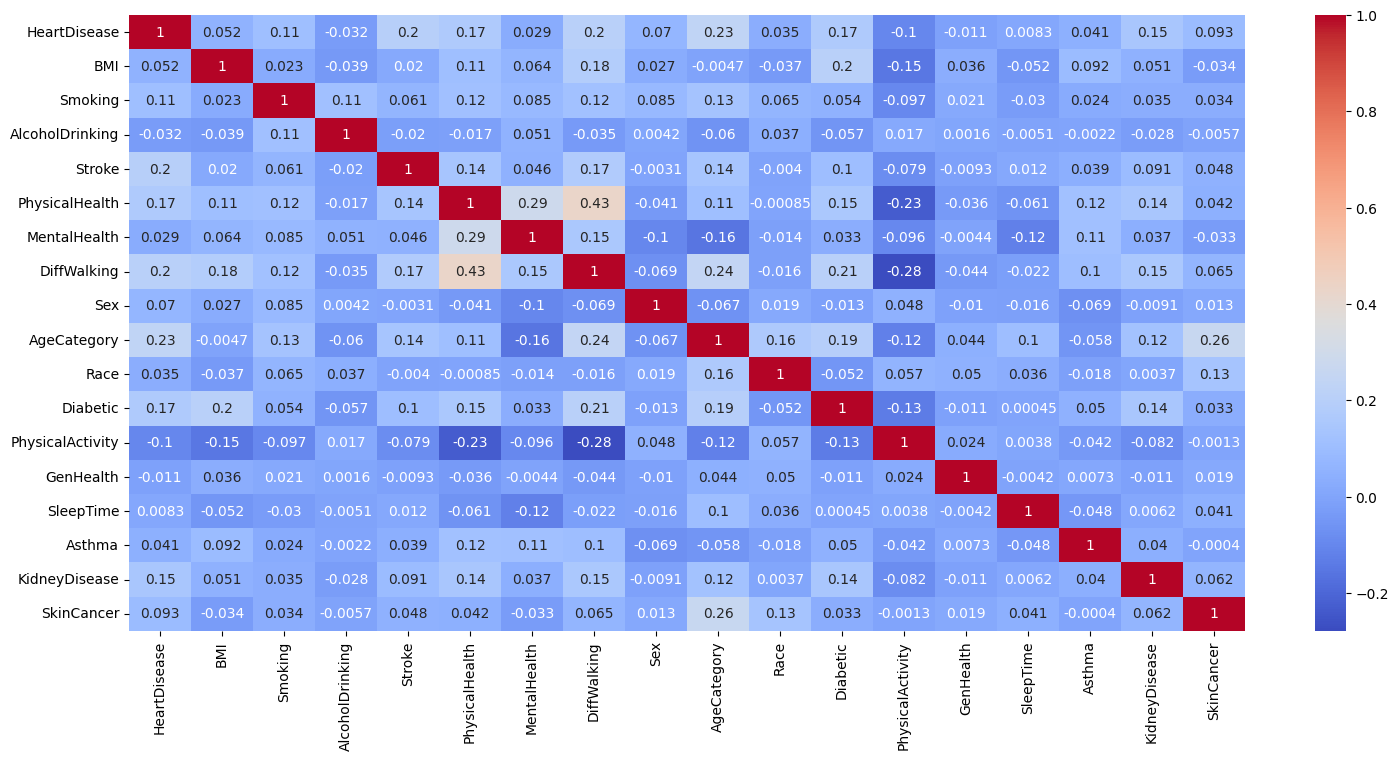

In [93]:
plt.figure(figsize=(18,8))
sns.heatmap(data=new_df.corr(),annot=True,cmap='coolwarm')



<Axes: xlabel='BMICategory', ylabel='count'>

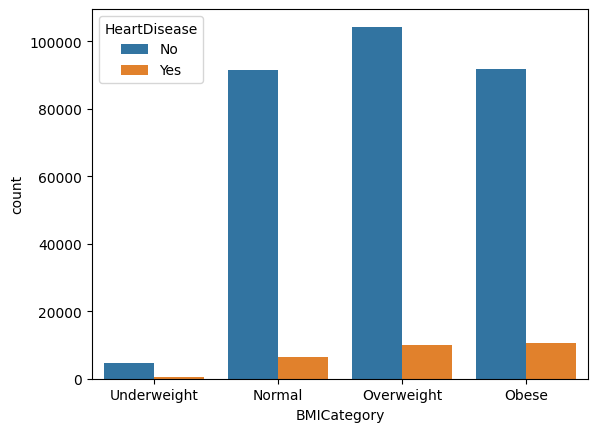

In [94]:
# Create a new column 'BMICategory' based on the BMI values
df['BMICategory'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Plot the count of 'BMICategory' and 'HeartDisease'
sns.countplot(x='BMICategory', hue='HeartDisease', data=df)


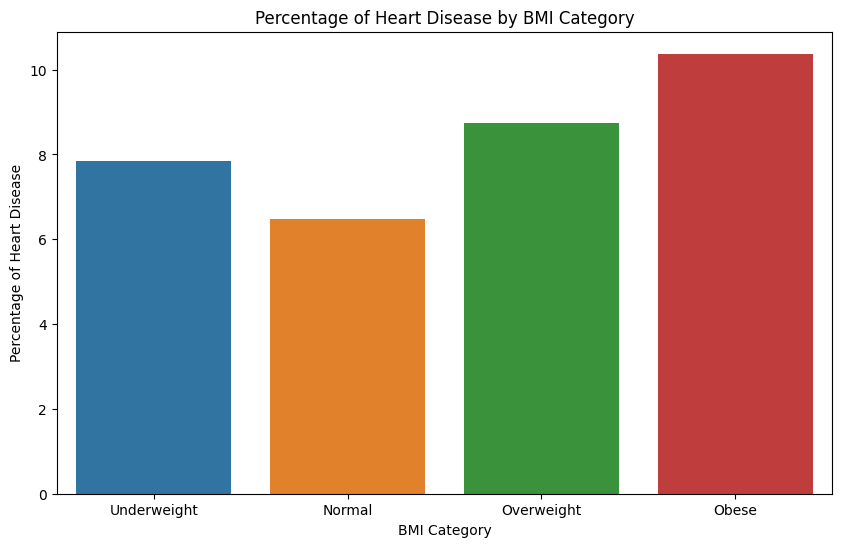

In [95]:
# Calculate percentage of 'Yes' values for each BMI category
bmi_heart_disease_perc = df.groupby(['BMICategory', 'HeartDisease'])['HeartDisease'].count().unstack()
bmi_heart_disease_perc['Total'] = bmi_heart_disease_perc.sum(axis=1)
bmi_heart_disease_perc['HeartDisease_Percentage'] = (bmi_heart_disease_perc['Yes'] / bmi_heart_disease_perc['Total']) * 100

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='BMICategory', y='HeartDisease_Percentage', data=bmi_heart_disease_perc.reset_index())
plt.title('Percentage of Heart Disease by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage of Heart Disease')
plt.show()


<Axes: xlabel='AgeCategory', ylabel='count'>

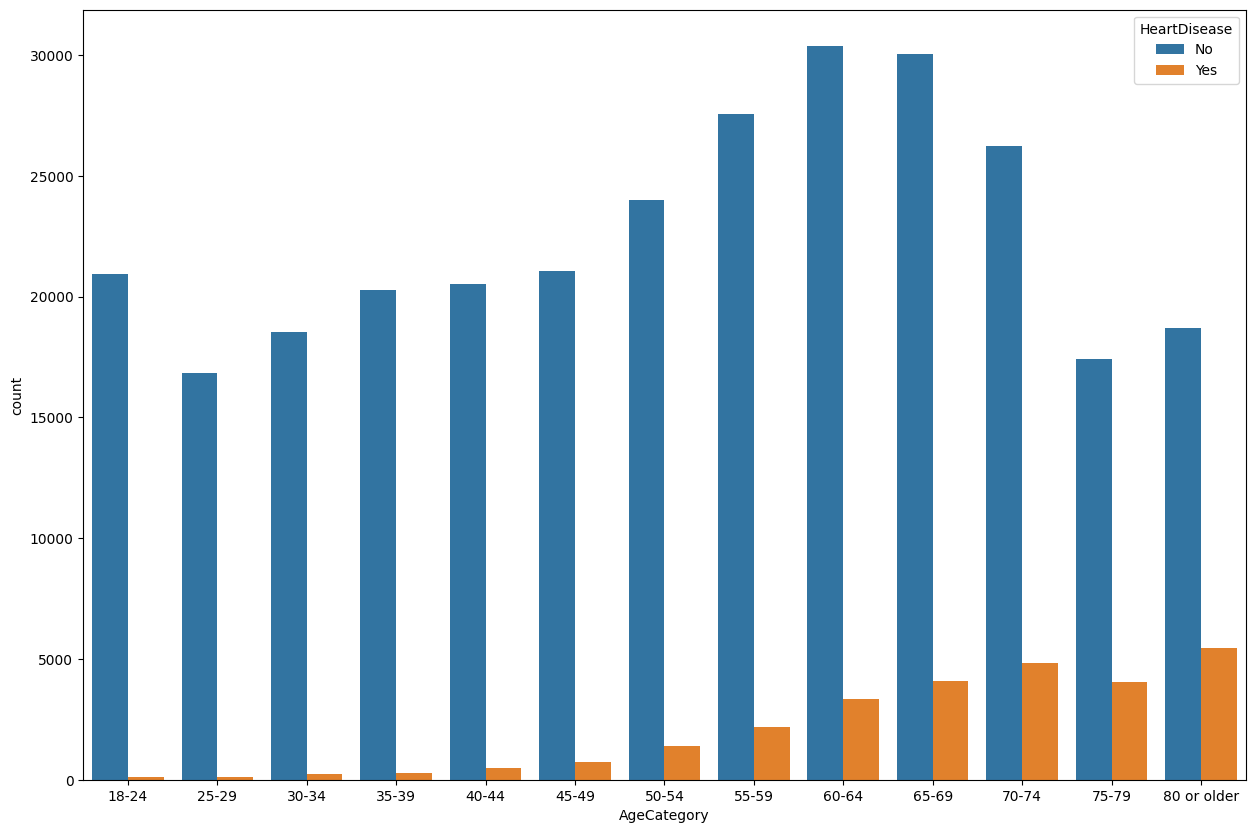

In [96]:
plt.figure(figsize=(15,10))
# create a list of the age categories in the desired order
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# create a categorical variable with the desired order
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)

sns.countplot(x='AgeCategory', hue='HeartDisease', data=df)

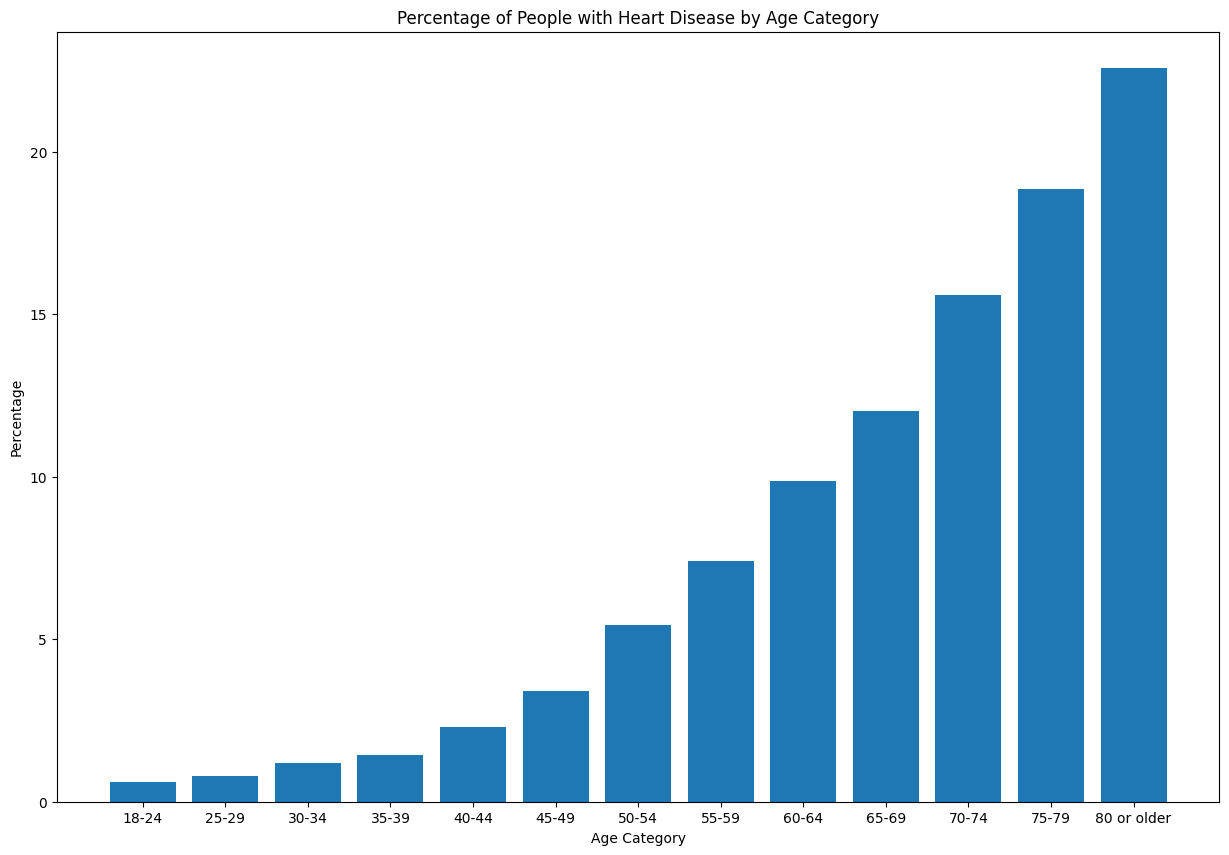

In [97]:
# create a dataframe with heart disease percentage by age category
age_df = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# filter for only those with heart disease
age_df = age_df[age_df['HeartDisease']=='Yes']

# create a bar chart
plt.figure(figsize=(15,10))
plt.bar(age_df['AgeCategory'], age_df['Percentage'])
plt.title('Percentage of People with Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage')
plt.show()

<Axes: xlabel='Stroke', ylabel='count'>

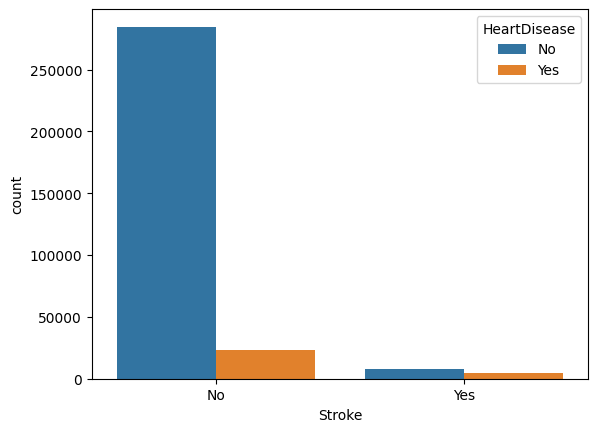

In [98]:
# count plot
sns.countplot(x='Stroke', hue='HeartDisease', data=df)

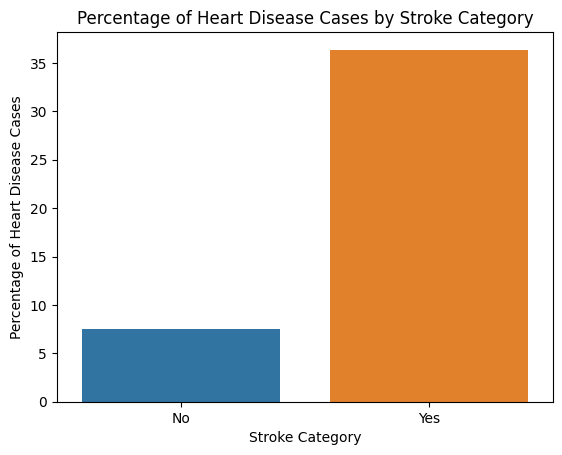

In [99]:
## percentage of people with heart disease by stroke
# Calculate percentage of heart disease cases for each stroke category
perc_stroke = df.groupby('Stroke')['HeartDisease'].value_counts(normalize=True)[:, 'Yes'] * 100

# Create bar plot
sns.barplot(x=perc_stroke.index, y=perc_stroke.values)
plt.title('Percentage of Heart Disease Cases by Stroke Category')
plt.xlabel('Stroke Category')
plt.ylabel('Percentage of Heart Disease Cases')
plt.show()


Text(0.5, 1.0, 'Count plot of Diabetic vs. Heart Disease')

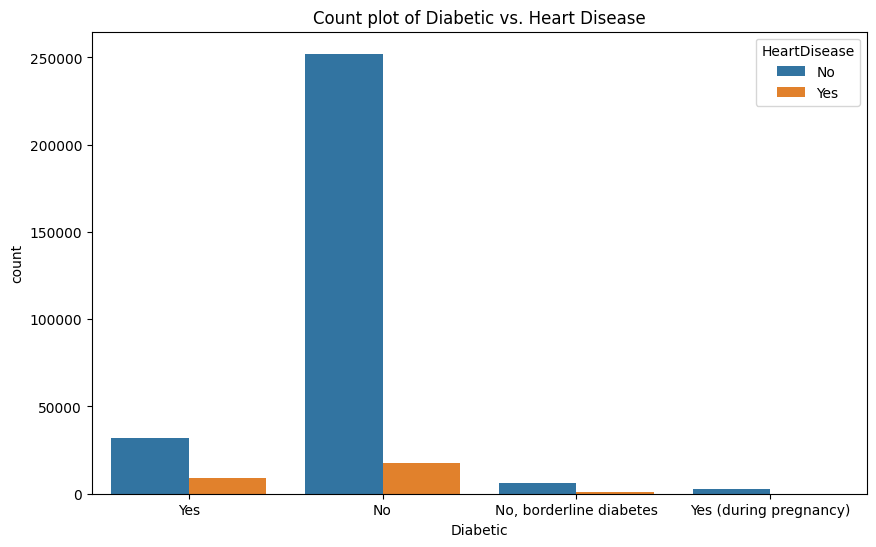

In [100]:
# Count plot for diabetic and heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetic', hue='HeartDisease', data=df)
plt.title('Count plot of Diabetic vs. Heart Disease')


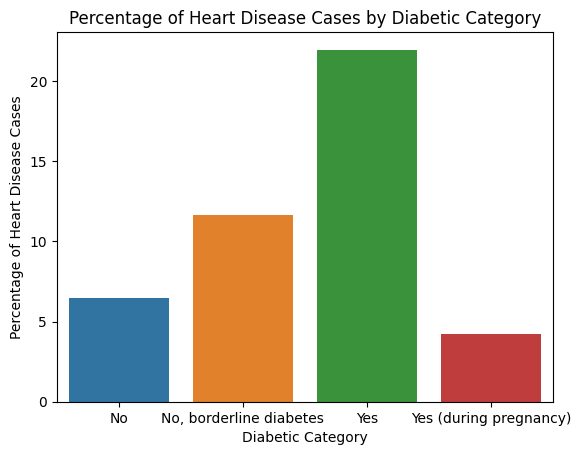

In [101]:
# create a grouped dataframe to calculate percentage
perc_stroke = df.groupby('Diabetic')['HeartDisease'].value_counts(normalize=True)[:, 'Yes'] * 100

# Create bar plot
sns.barplot(x=perc_stroke.index, y=perc_stroke.values)
plt.title('Percentage of Heart Disease Cases by Diabetic Category')
plt.xlabel('Diabetic Category')
plt.ylabel('Percentage of Heart Disease Cases')
plt.show()

In [105]:
# Separate the target variable from predictors
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier model
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.862505667693366


(array([ 1.,  0.,  0.,  3.,  3., 10., 13., 12.,  6.,  2.]),
 array([0.85993571, 0.86057487, 0.86121402, 0.86185318, 0.86249234,
        0.8631315 , 0.86377065, 0.86440981, 0.86504897, 0.86568813,
        0.86632728]),
 <BarContainer object of 10 artists>)

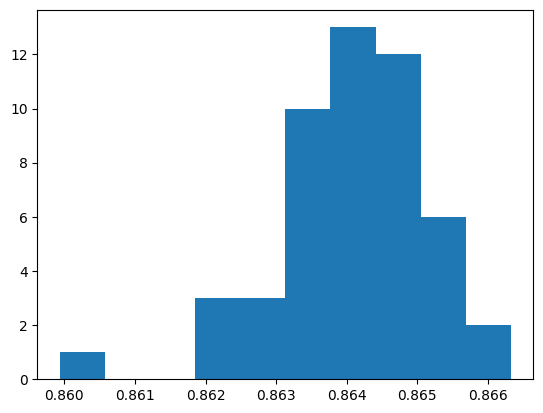

In [109]:
model_accuracies = []

for repetition in range(50):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Create the classifier
    clf = DecisionTreeClassifier()

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Predict the target variable for the testing data
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    model_accuracies.append(accuracy)

plt.hist(model_accuracies)